In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
#Reading the images
baboon_png = plt.imread('baboon.png')
landscape_jpg = plt.imread('landscape.jpg')
umbrella_png = Image.open('umbrella.png').convert('RGB') #The image was in RGBA format had to converted to RGB.
lenna_png = plt.imread('lenna.png')
peppers_png = plt.imread('peppers.png')

In [140]:
#Finding how many bytes a single image is consist of, and report the numbers uniquely 
file_sizes = dict()
paths = ["baboon.png", "landscape.jpg", "umbrella.png" , "lenna.png", "peppers.png"]
for path in paths:
  stat_info = os.stat(path)
  file_sizes[path] = stat_info.st_size
size_df = pd.DataFrame(file_sizes, index=["byte"])
size_df

baboon.png  landscape.jpg  umbrella.png  lenna.png  peppers.png
byte      637192          51570        478724     473831       538749

In [3]:
#Resizing the images to 256x256x3
baboon_resized = cv2.resize(baboon_png, (256,256))
landscape_resized = cv2.resize(landscape_jpg, (256,256))
umbrella_resized = cv2.resize(np.array(umbrella_png), (256,256))
lenna_resized = cv2.resize(lenna_png, (256,256))
peppers_resized = cv2.resize(peppers_png, (256,256))

In [4]:
#Saving files so that we can read the bytes of images from os
plt.imsave("baboon_resized.png", baboon_resized)
plt.imsave("landscape_resized.png", landscape_resized)
plt.imsave("umbrella_resized.png", umbrella_resized)
plt.imsave("lenna_resized.png", lenna_resized)
plt.imsave("peppers_resized.png", peppers_resized)

In [5]:
#Finding how many bytes a single image is consist of, and report the numbers uniquely
file_sizes = dict()
paths = ["baboon_resized.png", "landscape_resized.png", "umbrella_resized.png" , "lenna_resized.png", "peppers_resized.png"]
for path in paths:
  stat_info = os.stat(path)
  file_sizes[path] = stat_info.st_size
size_df = pd.DataFrame(file_sizes, index=["byte"])
size_df

baboon_resized.png  ...  peppers_resized.png
byte              177447  ...               137909

[1 rows x 5 columns]

In [6]:
#Finding how many unique colors a single image contains

unique_colors = {"Baboon": len(set( tuple(v) for m2d in baboon_resized for v in m2d )),
"Peppers": len(set( tuple(v) for m2d in peppers_resized for v in m2d )),
"Lenna": len(set( tuple(v) for m2d in lenna_resized for v in m2d )),
"Umbrella": len(set( tuple(v) for m2d in umbrella_resized for v in m2d )),
"Landscape": len(set( tuple(v) for m2d in landscape_resized for v in m2d ))}

colors_df = pd.DataFrame(unique_colors, index=["colors"])
colors_df

Baboon  Peppers  Lenna  Umbrella  Landscape
colors   65516    63973  65103     45085      34973

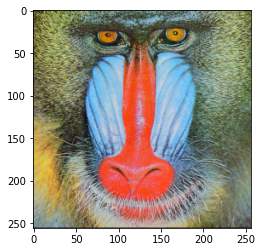

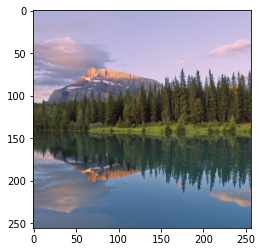

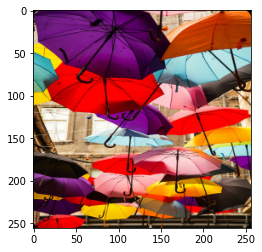

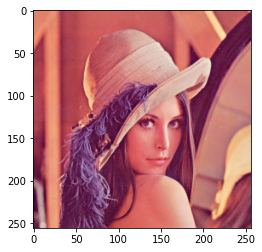

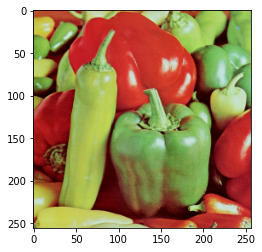

In [7]:
#Displaying the images
images = [baboon_resized, landscape_resized, lenna_resized, peppers_resized, umbrella_resized]
for image in images:
  plt.figure()
  plt.imshow(image)

In [8]:
#Pre-processing - Reshaping images to Nx3 -Baboon
rows = baboon_resized.shape[0]
cols = baboon_resized.shape[1]
 
baboon_reshaped = baboon_resized.reshape(rows*cols,3)
baboon_reshaped.shape

(65536, 3)

In [9]:
#Pre-processing - Reshaping images to Nx3 -Landscape
rows = landscape_resized.shape[0]
cols = landscape_resized.shape[1]
 
landscape_reshaped = landscape_resized.reshape(rows*cols,3)
landscape_reshaped.shape

(65536, 3)

In [10]:
#Pre-processing - Reshaping images to Nx3 -Umbrella
umbrella_png = np.array(umbrella_png)
rows = umbrella_resized.shape[0]
cols = umbrella_resized.shape[1]
 
umbrella_reshaped = umbrella_resized.reshape(rows*cols,3)
umbrella_reshaped.shape

(65536, 3)

In [11]:
#Pre-processing - Reshaping images to Nx3 -Lenna
rows = lenna_resized.shape[0]
cols = lenna_resized.shape[1]
 
lenna_reshaped = lenna_resized.reshape(rows*cols,3)
lenna_reshaped.shape

(65536, 3)

In [12]:
#Pre-processing - Reshaping images to Nx3 -Peppers
rows = peppers_resized.shape[0]
cols = peppers_resized.shape[1]
 
peppers_reshaped = peppers_resized.reshape(rows*cols,3)
peppers_reshaped.shape

(65536, 3)

In [13]:
class img:
  def __init__(self, cluster_centers, labels, cluster_count):
    self.cluster_centers = cluster_centers
    self.labels = labels
    self.cluster_count = cluster_count

In [14]:
#Initializing the K-Means clustering models for each image 
SSE = []
clusters = []

#for each k value, we estimated SSE error to decide the best k value
for image in [baboon_reshaped, landscape_reshaped, lenna_reshaped, peppers_reshaped, umbrella_reshaped]:
  for x in (2**p for p in range(1, 9)):
      kmeans=KMeans(n_clusters=x, init="k-means++", random_state=0)
      kmeans.fit(image)
      SSE.append(kmeans.inertia_)
      tmp_image = img(kmeans.cluster_centers_, kmeans.labels_, x)
      clusters.append(tmp_image)

In [15]:
#For each setup with different number of clusters, re-assign each pixel value as the closest cluster center to it
def replacePixelWithCentroid(cluster):
    pixels = []
    for label in cluster.labels:
        pixel_as_centroid = list(cluster.cluster_centers[label])
        pixels.append(pixel_as_centroid)
    pixels = np.array(pixels).reshape(256*256, -1)
    return pixels


In [16]:
#For each setup with different number of clusters, re-assign each pixel value as the closest cluster center to it
pixelList = []
for i in range(len(clusters)):
  pixelList.append(replacePixelWithCentroid(clusters[i]))


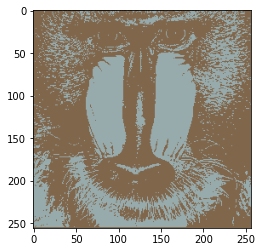

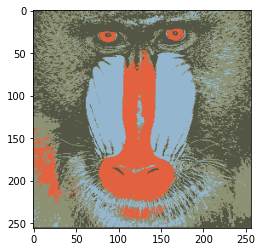

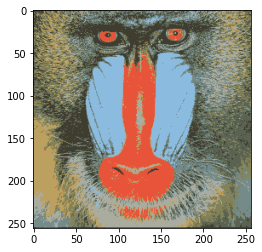

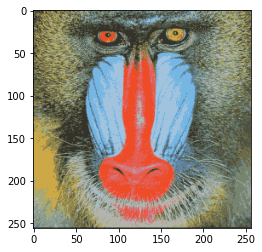

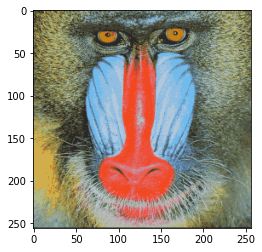

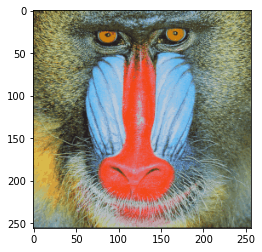

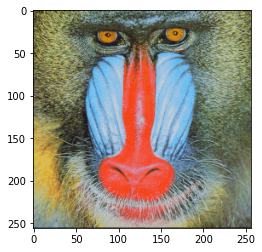

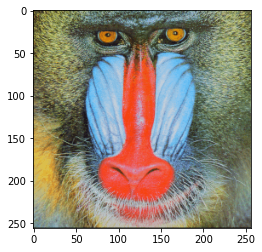

In [17]:
# Visualizing the 8 different compressed images in the notebook -Baboon
for image in pixelList[0:8]:
  plt.figure()
  plt.imshow(image.reshape(256,256,3))

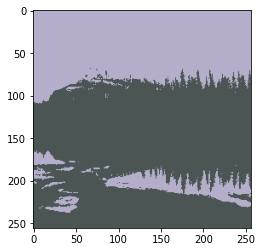

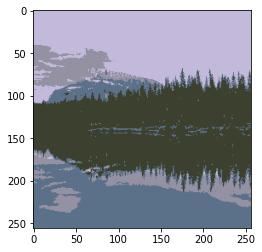

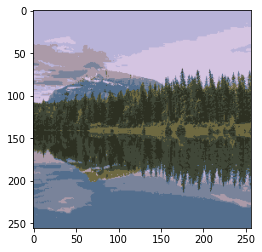

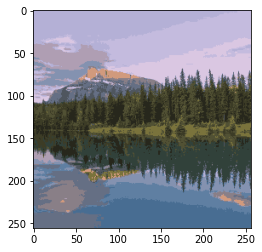

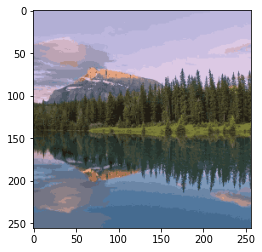

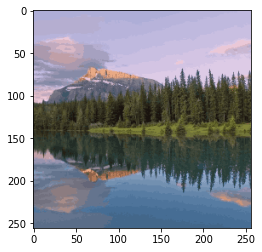

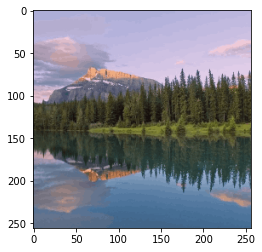

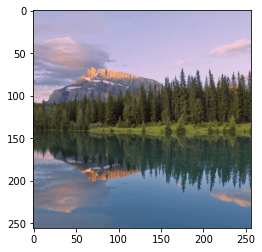

In [18]:
# Visualizing the 8 different compressed images in the notebook -Landscape
for image in pixelList[8:16]:
  plt.figure()
  plt.imshow((image/255).reshape(256,256,3))

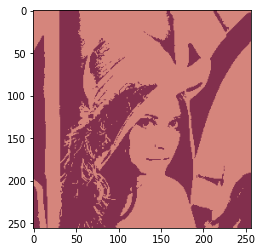

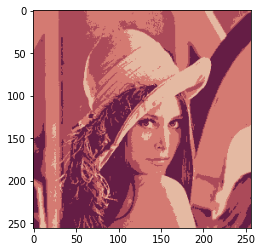

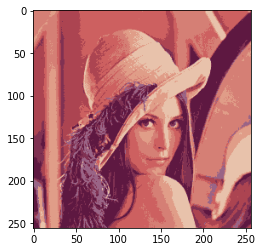

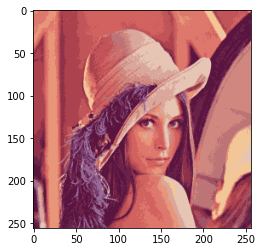

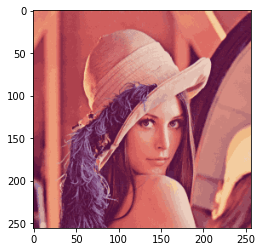

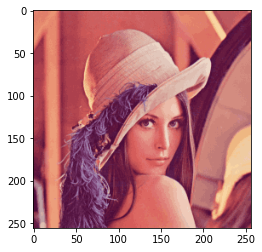

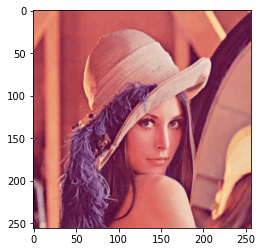

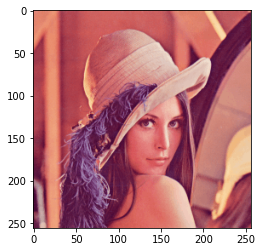

In [19]:
# Visualizing the 8 different compressed images in the notebook -Lenna
for image in pixelList[16:24]:
  plt.figure()
  plt.imshow(image.reshape(256,256,3))

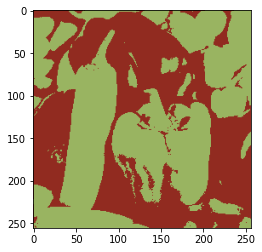

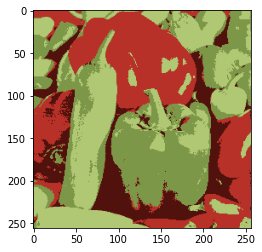

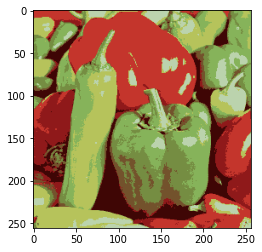

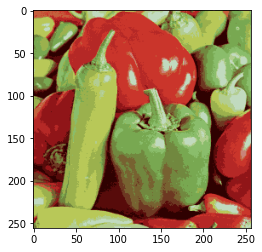

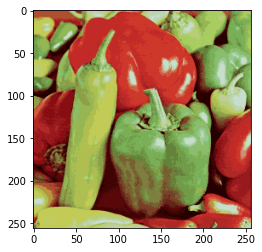

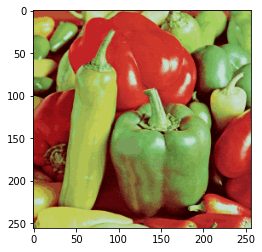

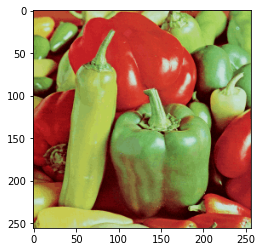

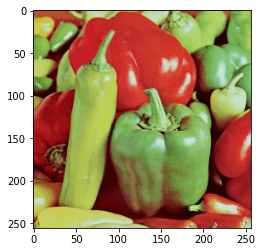

In [20]:
# Visualizing the 8 different compressed images in the notebook -Peppers
for image in pixelList[24:32]:
  plt.figure()
  plt.imshow(image.reshape(256,256,3))

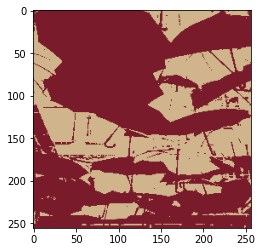

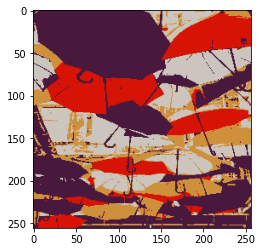

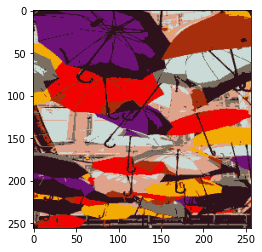

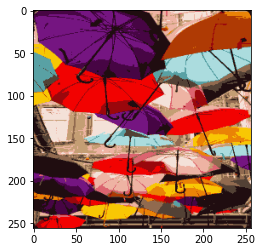

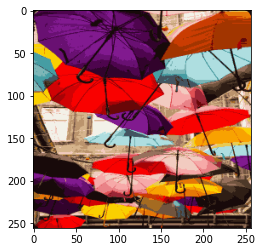

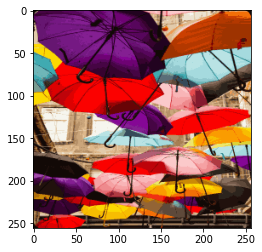

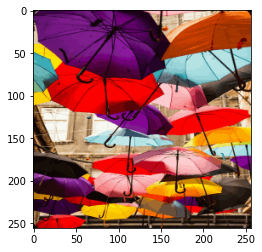

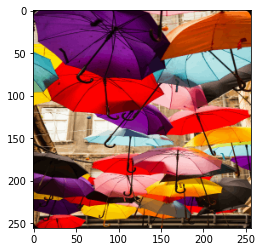

In [21]:
# Visualizing the 8 different compressed images in the notebook -Umbrella
for image in pixelList[32: ]:
  plt.figure()
  plt.imshow((image/255).reshape(256,256,3))

In [22]:
# Splitting the clusters 
reshaped_images = [baboon_reshaped, landscape_reshaped, lenna_reshaped, peppers_reshaped, umbrella_reshaped]
baboon_clusters = clusters[0:8]
landscape_clusters = clusters[8:16]
lenna_clusters = clusters[16:24]
peppers_clusters = clusters[24:32]
umbrella_clusters = clusters[32: ]

In [23]:
# Calculating the metrics for each number of clusters - WCSS - Baboon
wcssList = []
for c in baboon_clusters:
  cluster_centers = c.cluster_centers
  num_classes = len(cluster_centers)
  baboon_wcss = 0
  for i in range(len(baboon_reshaped)):
      x = baboon_reshaped[i]
      distances = np.zeros(num_classes)
      for j in range(num_classes):
        distances[j] = np.linalg.norm(cluster_centers[j] - x) 
      ind = np.argmin(distances)
      error = distances[ind]**2
      baboon_wcss = baboon_wcss + error
  wcssList.append(baboon_wcss)

72.33011160207178

In [24]:
# Calculating the metrics for each number of clusters - WCSS - Landscape
for c in landscape_clusters:
  cluster_centers = c.cluster_centers
  num_classes = len(cluster_centers)
  landscape_wcss = 0
  for i in range(len(landscape_reshaped)):
      x = landscape_reshaped[i]
      distances = np.zeros(num_classes)
      for j in range(num_classes):
        distances[j] = np.linalg.norm(cluster_centers[j] - x) 
      ind = np.argmin(distances)
      error = distances[ind]**2
      landscape_wcss = landscape_wcss + error
  wcssList.append(landscape_wcss)


In [25]:
# Calculating the metrics for each number of clusters - WCSS - Lenna
for c in lenna_clusters:
  cluster_centers = c.cluster_centers
  num_classes = len(cluster_centers)
  lenna_wcss = 0
  for i in range(len(lenna_reshaped)):
      x = lenna_reshaped[i]
      distances = np.zeros(num_classes)
      for j in range(num_classes):
        distances[j] = np.linalg.norm(cluster_centers[j] - x) 
      ind = np.argmin(distances)
      error = distances[ind]**2
      lenna_wcss = lenna_wcss + error
  wcssList.append(lenna_wcss)

22.89610313031862

In [26]:
# Calculating the metrics for each number of clusters - WCSS - Peppers
for c in peppers_clusters:
  cluster_centers = c.cluster_centers
  num_classes = len(cluster_centers)
  peppers_wcss = 0
  for i in range(len(peppers_reshaped)):
      x = peppers_reshaped[i]
      distances = np.zeros(num_classes)
      for j in range(num_classes):
        distances[j] = np.linalg.norm(cluster_centers[j] - x) 
      ind = np.argmin(distances)
      error = distances[ind]**2
      peppers_wcss = peppers_wcss + error
  wcssList.append(peppers_wcss)

42.65650584789171

In [27]:
# Calculating the metrics for each number of clusters - WCSS - Umbrella
for c in umbrella_clusters:
  cluster_centers = c.cluster_centers
  num_classes = len(cluster_centers)
  umbrella_wcss = 0
  for i in range(len(umbrella_reshaped)):
      x = umbrella_reshaped[i]
      distances = np.zeros(num_classes)
      for j in range(num_classes):
        distances[j] = np.linalg.norm(cluster_centers[j] - x) 
      ind = np.argmin(distances)
      error = distances[ind]**2
      umbrella_wcss = umbrella_wcss + error
  wcssList.append(umbrella_wcss)

4131115.8570492663

In [28]:
# Finding the mean of each dimension in the reshaped image array - Prephase for Total Sum of Squares - Baboon
size, dimensions = baboon_reshaped.shape
mean_dimensions = np.zeros(dimensions)

for k in range(dimensions):
    o_mean = np.mean(baboon_reshaped[:][k])
    mean_dimensions[k] = o_mean

mean_dimensions

array([0.36209151, 0.21143793, 0.3267974 ])

In [29]:
# Calculating the metrics for each number of clusters - Total Sum of Squares - Baboon
baboon_tss = 0
for y in range(size):
  point = baboon_reshaped[y]
  first_sum = np.linalg.norm(mean_dimensions - point)
  second_sum = first_sum ** 2
  baboon_tss = baboon_tss + second_sum
baboon_tss

16816.596418863337

In [30]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -2 Clusters
baboon_bcss_2 = baboon_tss - wcssList[0]
baboon_bcss_2

12146.554569928554

In [31]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -4 Clusters
baboon_bcss_4 = baboon_tss - wcssList[1]
baboon_bcss_4

14920.387124110246

In [32]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -8 Clusters
baboon_bcss_8 = baboon_tss - wcssList[2]
baboon_bcss_8

15843.356996561737

In [33]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -16 Clusters
baboon_bcss_16 = baboon_tss - wcssList[3]
baboon_bcss_16

16289.922995620997

In [34]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -32 Clusters
baboon_bcss_32 = baboon_tss - wcssList[4]
baboon_bcss_32

16518.79466106691

In [35]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -64 Clusters
baboon_bcss_64 = baboon_tss - wcssList[5]
baboon_bcss_64

16635.53667689901

In [36]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -128 Clusters
baboon_bcss_128 = baboon_tss - wcssList[6]
baboon_bcss_128

16702.055878460284

In [37]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Baboon -256 Clusters
baboon_bcss_256 = baboon_tss - wcssList[7]
baboon_bcss_256

16744.266307261267

In [38]:
# Finding the mean of each dimension in the reshaped image array - Prephase for Total Sum of Squares - Landscape
size, dimensions = landscape_reshaped.shape
mean_dimensions = np.zeros(dimensions)

for k in range(dimensions):
    o_mean = np.mean(landscape_reshaped[:][k])
    mean_dimensions[k] = o_mean

mean_dimensions

array([186.66666667, 186.66666667, 186.66666667])

In [39]:
# Calculating the metrics for each number of clusters - Total Sum of Squares - Landscape
landscape_tss = 0
for y in range(size):
  point = landscape_reshaped[y]
  first_sum = np.linalg.norm(mean_dimensions - point)
  second_sum = first_sum ** 2
  landscape_tss = landscape_tss + second_sum
landscape_tss

1526764048.0000136

In [40]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -2 Clusters
landscape_bcss_2 = landscape_tss - wcssList[8]
landscape_bcss_2

1324360607.9302645

In [41]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -4 Clusters
landscape_bcss_4 = landscape_tss - wcssList[9]
landscape_bcss_4

1466753450.8185093

In [42]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -8 Clusters
landscape_bcss_8 = landscape_tss - wcssList[10]
landscape_bcss_8

1495740517.6362488

In [43]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -16 Clusters
landscape_bcss_16 = landscape_tss - wcssList[11]
landscape_bcss_16

1512188846.221746

In [44]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -32 Clusters
landscape_bcss_32 = landscape_tss - wcssList[12]
landscape_bcss_32

1519426057.6812232

In [45]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -64 Clusters
landscape_bcss_64 = landscape_tss - wcssList[13]
landscape_bcss_64

1522846264.5120165

In [46]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -128 Clusters
landscape_bcss_128 = landscape_tss - wcssList[14]
landscape_bcss_128

1524536768.6623943

In [47]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Landscape -256 Clusters
landscape_bcss_256 = landscape_tss - wcssList[15]
landscape_bcss_256

1525447710.2968519

In [48]:
# Finding the mean of each dimension in the reshaped image array - Prephase for Total Sum of Squares - Lenna
size, dimensions = lenna_reshaped.shape
mean_dimensions = np.zeros(dimensions)

for k in range(dimensions):
    o_mean = np.mean(lenna_reshaped[:][k])
    mean_dimensions[k] = o_mean

mean_dimensions

array([0.63790852, 0.6405229 , 0.624183  ])

In [49]:
# Calculating the metrics for each number of clusters - Total Sum of Squares - Lenna
lenna_tss = 0
for y in range(size):
  point = lenna_reshaped[y]
  first_sum = np.linalg.norm(mean_dimensions - point)
  second_sum = first_sum ** 2
  lenna_tss = lenna_tss + second_sum
lenna_tss

13648.089359292224

In [50]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -2 Clusters
lenna_bcss_2 = lenna_tss - wcssList[16] 
lenna_bcss_2

11388.347688215243

In [51]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -4 Clusters
lenna_bcss_4 = lenna_tss - wcssList[17] 
lenna_bcss_4

12855.615151960914

In [52]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -8 Clusters
lenna_bcss_8 = lenna_tss - wcssList[18] 
lenna_bcss_8

13271.119604458974

In [53]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -16 Clusters
lenna_bcss_16 = lenna_tss - wcssList[19] 
lenna_bcss_16

13458.967180279116

In [54]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -32 Clusters
lenna_bcss_32 = lenna_tss - wcssList[20] 
lenna_bcss_32

13546.884828120894

In [55]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -64 Clusters
lenna_bcss_64 = lenna_tss - wcssList[21] 
lenna_bcss_64

13589.029679476567

In [56]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -128 Clusters
lenna_bcss_128 = lenna_tss - wcssList[22] 
lenna_bcss_128

13611.715450481777

In [57]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Lenna -256 Clusters
lenna_bcss_256 = lenna_tss - wcssList[23] 
lenna_bcss_256

13625.193256161905

In [58]:
# Finding the mean of each dimension in the reshaped image array - Prephase for Total Sum of Squares - Peppers
size, dimensions = peppers_reshaped.shape
mean_dimensions = np.zeros(dimensions)

for k in range(dimensions):
    o_mean = np.mean(peppers_reshaped[:][k])
    mean_dimensions[k] = o_mean

mean_dimensions

array([0.27418301, 0.40686277, 0.40620914])

In [59]:
# Calculating the metrics for each number of clusters - Total Sum of Squares - Peppers
peppers_tss = 0
for y in range(size):
  point = peppers_reshaped[y]
  first_sum = np.linalg.norm(mean_dimensions - point)
  second_sum = first_sum ** 2
  peppers_tss = peppers_tss + second_sum
peppers_tss

17420.89249054323

In [60]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -2 Clusters
peppers_bcss_2 = peppers_tss - wcssList[24] 
peppers_bcss_2

13764.384637791221

In [61]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -4 Clusters
peppers_bcss_4 = peppers_tss - wcssList[25] 
peppers_bcss_4

15806.727908916408

In [62]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -8 Clusters
peppers_bcss_8 = peppers_tss - wcssList[26] 
peppers_bcss_8

16739.184279508525

In [63]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -16 Clusters
peppers_bcss_16 = peppers_tss - wcssList[27] 
peppers_bcss_16

17055.229373712402

In [64]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -32 Clusters
peppers_bcss_32 = peppers_tss - wcssList[28] 
peppers_bcss_32

17210.1880991963

In [65]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -64 Clusters
peppers_bcss_64 = peppers_tss - wcssList[29] 
peppers_bcss_64

17302.716521140974

In [66]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -128 Clusters
peppers_bcss_128 = peppers_tss - wcssList[30] 
peppers_bcss_128

17351.59651492675

In [67]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Peppers -256 Clusters
peppers_bcss_256 = peppers_tss - wcssList[31] 
peppers_bcss_256

17378.235984695337

In [68]:
# Finding the mean of each dimension in the reshaped image array - Prephase for Total Sum of Squares - Umbrella
size, dimensions = umbrella_reshaped.shape
mean_dimensions = np.zeros(dimensions)

for k in range(dimensions):
    o_mean = np.mean(umbrella_reshaped[:][k])
    mean_dimensions[k] = o_mean

mean_dimensions

array([0., 0., 0.])

In [69]:
# Calculating the metrics for each number of clusters - Total Sum of Squares - Umbrella
umbrella_tss = 0
for y in range(size):
  point = umbrella_reshaped[y]
  first_sum = np.linalg.norm(mean_dimensions - point)
  second_sum = first_sum ** 2
  umbrella_tss = umbrella_tss + second_sum
umbrella_tss

3538362532.0

In [70]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -2 Clusters
umbrella_bcss_2 = umbrella_tss - wcssList[32] 
umbrella_bcss_2

2943765010.0617056

In [71]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -4 Clusters
umbrella_bcss_4 = umbrella_tss - wcssList[33] 
umbrella_bcss_4

3259383670.9280176

In [72]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -8 Clusters
umbrella_bcss_8 = umbrella_tss - wcssList[34] 
umbrella_bcss_8

3421235235.510369

In [73]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -16 Clusters
umbrella_bcss_16 = umbrella_tss - wcssList[35] 
umbrella_bcss_16

3485506891.289052

In [74]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -32 Clusters
umbrella_bcss_32 = umbrella_tss - wcssList[36] 
umbrella_bcss_32

3511427968.378231

In [75]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -64 Clusters
umbrella_bcss_64 = umbrella_tss - wcssList[37] 
umbrella_bcss_64

3524495320.0244694

In [76]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -128 Clusters
umbrella_bcss_128 = umbrella_tss - wcssList[38] 
umbrella_bcss_128

3530893957.2270603

In [77]:
# Calculating the metrics for each number of clusters - BCSS -> (TSS - WCSS) -Umbrella -256 Clusters
umbrella_bcss_256 = umbrella_tss - wcssList[39] 
umbrella_bcss_256

3534231416.1429505

In [78]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 2 Clusters
explained_var = baboon_bcss_2 / baboon_tss
baboon_silhouette_2 = explained_var
print(baboon_silhouette_2)

0.7222956576577915


In [79]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 4 Clusters
explained_var = baboon_bcss_4 / baboon_tss
baboon_silhouette_4 = explained_var
print(baboon_silhouette_4)

0.8872417909354062


In [80]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 8 Clusters
explained_var = baboon_bcss_8 / baboon_tss
baboon_silhouette_8 = explained_var
print(baboon_silhouette_8)

0.9421262544417188


In [81]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 16 Clusters
explained_var = baboon_bcss_16 / baboon_tss
baboon_silhouette_16 = explained_var
print(baboon_silhouette_16)

0.9686813306257641


In [82]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 32 Clusters
explained_var = baboon_bcss_32 / baboon_tss
baboon_silhouette_32 = explained_var
print(baboon_silhouette_32)

0.9822911991000521


In [83]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 64 Clusters
explained_var = baboon_bcss_64 / baboon_tss
baboon_silhouette_64 = explained_var
print(baboon_silhouette_64)

0.989233270665803


In [84]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 128 Clusters
explained_var = baboon_bcss_128 / baboon_tss
baboon_silhouette_128 = explained_var
print(baboon_silhouette_128)

0.9931888393138476


In [85]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Baboon - 256 Clusters
explained_var = baboon_bcss_256 / baboon_tss
baboon_silhouette_256 = explained_var
print(baboon_silhouette_256)

0.9956988852083685


In [86]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -2 Clusters
explained_var = landscape_bcss_2 / landscape_tss
landscape_silhouette_2 = explained_var
print(landscape_silhouette_2)


0.8674297837083027


In [87]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -4 Clusters
explained_var = landscape_bcss_4 / landscape_tss
landscape_silhouette_4 = explained_var
print(landscape_silhouette_4)


0.9606942557626273


In [88]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -8 Clusters
explained_var = landscape_bcss_8 / landscape_tss
landscape_silhouette_8 = explained_var
print(landscape_silhouette_8)


0.9796802063787106


In [89]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -16 Clusters
explained_var = landscape_bcss_16 / landscape_tss
landscape_silhouette_16 = explained_var
print(landscape_silhouette_16)


0.9904535335388854


In [90]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -32 Clusters
explained_var = landscape_bcss_32 / landscape_tss
landscape_silhouette_32 = explained_var
print(landscape_silhouette_32)


0.9951937626980392


In [91]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -64 Clusters
explained_var = landscape_bcss_64 / landscape_tss
landscape_silhouette_64 = explained_var
print(landscape_silhouette_64)


0.99743392995589


In [92]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -128 Clusters
explained_var = landscape_bcss_128 / landscape_tss
landscape_silhouette_128 = explained_var
print(landscape_silhouette_128)

0.9985411764571369


In [93]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Landscape -256 Clusters
explained_var = landscape_bcss_256 / landscape_tss
landscape_silhouette_256 = explained_var
print(landscape_silhouette_256)

0.9991378250588976


In [94]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 2 Clusters
explained_var = lenna_bcss_2 / lenna_tss
lenna_silhouette_2 = explained_var
print(lenna_silhouette_2)


0.8344279839039558


In [95]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 4 Clusters
explained_var = lenna_bcss_4 / lenna_tss
lenna_silhouette_4 = explained_var
print(lenna_silhouette_4)


0.9419351539641145


In [96]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 8 Clusters
explained_var = lenna_bcss_8 / lenna_tss
lenna_silhouette_8 = explained_var
print(lenna_silhouette_8)


0.9723793019733863


In [97]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 16 Clusters
explained_var = lenna_bcss_16 / lenna_tss
lenna_silhouette_16 = explained_var
print(lenna_silhouette_16)


0.9861429556889335


In [98]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 32 Clusters
explained_var = lenna_bcss_32 / lenna_tss
lenna_silhouette_32 = explained_var
print(lenna_silhouette_32)


0.9925847106868168


In [99]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 64 Clusters
explained_var = lenna_bcss_64 / lenna_tss
lenna_silhouette_64 = explained_var
print(lenna_silhouette_64)


0.995672677818786


In [100]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 128 Clusters
explained_var = lenna_bcss_128 / lenna_tss
lenna_silhouette_128 = explained_var
print(lenna_silhouette_128)


0.9973348717279843


In [101]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Lenna - 256 Clusters
explained_var = lenna_bcss_256 / lenna_tss
lenna_silhouette_256 = explained_var
print(lenna_silhouette_256)


0.9983223949867583


In [102]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 2 Clusters
explained_var = peppers_bcss_2 / peppers_tss
peppers_silhouette_2 = explained_var
print(peppers_silhouette_2)


0.7901078917319013


In [103]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 4 Clusters
explained_var = peppers_bcss_4 / peppers_tss
peppers_silhouette_4 = explained_var
print(peppers_silhouette_4)


0.9073431752992531


In [104]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 8 Clusters
explained_var = peppers_bcss_8 / peppers_tss
peppers_silhouette_8 = explained_var
print(peppers_silhouette_8)


0.9608683532485628


In [105]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 16 Clusters
explained_var = peppers_bcss_16 / peppers_tss
peppers_silhouette_16 = explained_var
print(peppers_silhouette_16)


0.979010081313037


In [106]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 32 Clusters
explained_var = peppers_bcss_32 / peppers_tss
peppers_silhouette_32 = explained_var
print(peppers_silhouette_32)


0.9879050748139737


In [107]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 64 Clusters
explained_var = peppers_bcss_64 / peppers_tss
peppers_silhouette_64 = explained_var
print(peppers_silhouette_64)


0.9932164227827934


In [108]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 128 Clusters
explained_var = peppers_bcss_128 / peppers_tss
peppers_silhouette_128 = explained_var
print(peppers_silhouette_128)


0.9960222488225505


In [109]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Peppers - 256 Clusters
explained_var = peppers_bcss_256 / peppers_tss
peppers_silhouette_256 = explained_var
print(peppers_silhouette_256)


0.9975514167330378


In [110]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 2 Clusters
explained_var = umbrella_bcss_2 / umbrella_tss
umbrella_silhouette_2 = explained_var
print(umbrella_silhouette_2)


0.8319568680255587


In [111]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 4 Clusters
explained_var = umbrella_bcss_4 / umbrella_tss
umbrella_silhouette_4 = explained_var
print(umbrella_silhouette_4)

0.9211559418943163


In [112]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 8 Clusters
explained_var = umbrella_bcss_8 / umbrella_tss
umbrella_silhouette_8 = explained_var
print(umbrella_silhouette_8)

0.9668978813136406


In [113]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 16 Clusters
explained_var = umbrella_bcss_16 / umbrella_tss
umbrella_silhouette_16 = explained_var
print(umbrella_silhouette_16)

0.9850621183575917


In [114]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 32 Clusters
explained_var = umbrella_bcss_32 / umbrella_tss
umbrella_silhouette_32 = explained_var
print(umbrella_silhouette_32)

0.9923878451181358


In [115]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 64 Clusters
explained_var = umbrella_bcss_64 / umbrella_tss
umbrella_silhouette_64 = explained_var
print(umbrella_silhouette_64)

0.9960808956543827


In [116]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 128 Clusters
explained_var = umbrella_bcss_128 / umbrella_tss
umbrella_silhouette_128 = explained_var
print(umbrella_silhouette_128)

0.9978892567662596


In [117]:
# Calculating the metrics for each number of clusters - Silhouette Coefficients(Explained Variance) - Umbrella - 256 Clusters
explained_var = umbrella_bcss_256 / umbrella_tss
umbrella_silhouette_256 = explained_var
print(umbrella_silhouette_256)

0.998832478068686


In [118]:
# Initializing BCSS and Silohuette Coefficient Lists by each cluster
bcssList = [baboon_bcss_2, baboon_bcss_4, baboon_bcss_8, baboon_bcss_16, baboon_bcss_32, baboon_bcss_64, baboon_bcss_128, baboon_bcss_256, landscape_bcss_2, landscape_bcss_4, landscape_bcss_8, landscape_bcss_16, landscape_bcss_32, landscape_bcss_64, landscape_bcss_128, landscape_bcss_256, lenna_bcss_2, lenna_bcss_4, lenna_bcss_8, lenna_bcss_16, lenna_bcss_32, lenna_bcss_64, lenna_bcss_128, lenna_bcss_256, peppers_bcss_2, peppers_bcss_4, peppers_bcss_8, peppers_bcss_16, peppers_bcss_32, peppers_bcss_64, peppers_bcss_128, peppers_bcss_256, umbrella_bcss_2, umbrella_bcss_4, umbrella_bcss_8, umbrella_bcss_16, umbrella_bcss_32, umbrella_bcss_64, umbrella_bcss_128, umbrella_bcss_256]
silhouette_list = [baboon_silhouette_2, baboon_silhouette_4, baboon_silhouette_8, baboon_silhouette_16, baboon_silhouette_32, baboon_silhouette_64, baboon_silhouette_128, baboon_silhouette_256, landscape_silhouette_2, landscape_silhouette_4, landscape_silhouette_8, landscape_silhouette_16, landscape_silhouette_32, landscape_silhouette_64, landscape_silhouette_128, landscape_silhouette_256, lenna_silhouette_2, lenna_silhouette_4, lenna_silhouette_8, lenna_silhouette_16, lenna_silhouette_32, lenna_silhouette_64, lenna_silhouette_128, lenna_silhouette_256, peppers_silhouette_2, peppers_silhouette_4, peppers_silhouette_8, peppers_silhouette_16, peppers_silhouette_32, peppers_silhouette_64, peppers_silhouette_128, peppers_silhouette_256, umbrella_silhouette_2, umbrella_silhouette_4, umbrella_silhouette_8, umbrella_silhouette_16, umbrella_silhouette_32, umbrella_silhouette_64, umbrella_silhouette_128, umbrella_silhouette_256]

In [119]:
#Saving files so that we can read the bytes of images from os
file_names = []
names_list = ["baboon", "landscape", "lenna", "peppers", "umbrella"]
for name in names_list:
  for x in (2**p for p in range(1, 9)):
    file_names.append(f"{name}_{x}")

for i in range(len(pixelList)):
  if i >= 8 and i < 16 or i>=32:
    plt.imsave(f"{file_names[i]}.png", (pixelList[i]/255).reshape(256,256,3))
  else:
    plt.imsave(f"{file_names[i]}.png", pixelList[i].reshape(256,256,3))

In [120]:
file_sizes = {}
for name in names_list:
  for x in (2**p for p in range(1, 9)):
    stat_info = os.stat(f"{name}_{x}.png")
    file_sizes[f"{name}_{x}"] = stat_info.st_size
sizeList = list(file_sizes.values())

In [121]:
# Finding the sizes of images for each clusters
size_df = pd.DataFrame(file_sizes, index=["byte"])
size_df


baboon_2  baboon_4  baboon_8  ...  umbrella_64  umbrella_128  umbrella_256
byte     11290     18328     37355  ...        57831         73353         87435

[1 rows x 40 columns]

In [122]:
!pip install webcolors

In [123]:
'''
import webcolors as wc
name_of_centroid_colors = {}
for i in range(len(clusters)):
  name_of_centroid_colors[i] = []
  for centers in clusters[i].cluster_centers:
    name_of_centroid_colors[i].append(wc.rgb_to_name((255*centers).astype(int)))'''

'\nimport webcolors as wc\nname_of_centroid_colors = {}\nfor i in range(len(clusters)):\n  name_of_centroid_colors[i] = []\n  for centers in clusters[i].cluster_centers:\n    name_of_centroid_colors[i].append(wc.rgb_to_name((255*centers).astype(int)))'

In [124]:
# Creating the resultant metrics table
metrics_by_clusters = {
"Baboon WCSS": wcssList[0:8] ,
"Landscape WCSS": wcssList[8:16],
"Lenna WCSS": wcssList[16:24],
"Peppers WCSS": wcssList[24:32],
"Umbrella WCSS": wcssList[32:40], 
"Baboon BCSS": bcssList[0:8] ,
"Landscape BCSS": bcssList[8:16],
"Lenna BCSS": bcssList[16:24],
"Peppers BCSS": bcssList[24:32],
"Umbrella BCSS": bcssList[32:40],
"Baboon Silhouette": silhouette_list[0:8] ,
"Landscape Silhouette": silhouette_list[8:16],
"Lenna Silhouette": silhouette_list[16:24],
"Peppers Silhouette": silhouette_list[24:32],
"Umbrella Silhouette": silhouette_list[32:40], 
"Baboon Size": sizeList[0:8],
"Landscape Size": sizeList[8:16],
"Lenna Size": sizeList[16:24],
"Peppers Size": sizeList[24:32],
"Umbrella Size": sizeList[32:40]
}

metrics_df = pd.DataFrame(metrics_by_clusters, index=[('2Cluster'), ('4Cluster'),
                                               ('8Cluster'), ('16Cluster'), ('32Cluster'),
                                               ('64Cluster'), ('128Cluster'), ('256Cluster')])
metrics_df

Baboon WCSS  Landscape WCSS  ...  Peppers Size  Umbrella Size
2Cluster    4670.041849    2.024034e+08  ...          4869           5422
4Cluster    1896.209295    6.001060e+07  ...         10607          10284
8Cluster     973.239422    3.102353e+07  ...         17933          17324
16Cluster    526.673423    1.457520e+07  ...         30015          26101
32Cluster    297.801758    7.337990e+06  ...         43880          41914
64Cluster    181.059742    3.917783e+06  ...         59777          57831
128Cluster   114.540540    2.227279e+06  ...         79997          73353
256Cluster    72.330112    1.316338e+06  ...         98251          87435

[8 rows x 20 columns]

In [125]:

baboon_silhouette = silhouette_list[0:8]
landscape_silhouette = silhouette_list[8:16]
lenna_silhouette = silhouette_list[16:24]
peppers_silhouette = silhouette_list[24:32]
umbrella_silhouette = silhouette_list[32:]
baboon_size = sizeList[0:8]
landscape_size = sizeList[8:16]
lenna_size = sizeList[16:24]
peppers_size = sizeList[24:32]
umbrella_size = sizeList[32:]


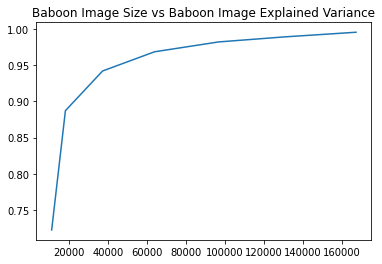

In [142]:
# In order to find the optimal elbow point mathematically, we draw a line from the first element in our silhouette score and the last element in our silhouette score. 
# And, we need to find the differences between each (silhouette score,image size(bytes)) point to our line. 
# The point which has the largest distance to our line will represent the optimal cluster count.  
# Baboon
distances = []
for i in range(len(baboon_size)):
  if i < 7:
    p1 = (baboon_size[0], baboon_silhouette[0])
    p2 = (baboon_size[7], baboon_silhouette[7])
    p3 = (baboon_size[i + 1], baboon_silhouette[i])
  distances.append(np.abs(np.cross(tuple(map(lambda i, j: i - j, p2, p1)) , tuple(map(lambda i, j: i - j, p1, p3)) )) / np.linalg.norm(tuple(map(lambda i, j: i - j, p2, p1))))
# We need to add 2 to the value because we find the differences of each point thus one point is removed. And list index starts from 0.
optimal_k = 2**(distances.index(np.max(distances)) + 2)
optimal_k
plt.title("Baboon Image Size vs Baboon Image Explained Variance")
plt.plot(baboon_size, baboon_silhouette)

Optimal Cluster count for Baboon Image:  16


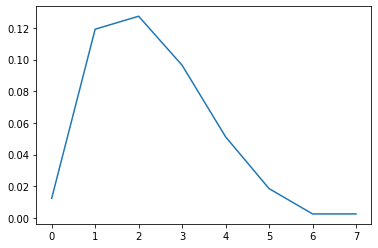

In [143]:
plt.plot(distances)
print("Optimal Cluster count for Baboon Image: ", optimal_k)

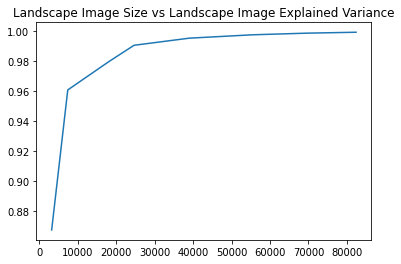

In [144]:
# In order to find the optimal elbow point mathematically, we draw a line from the first element in our silhouette score and the last element in our silhouette score. 
# And, we need to find the differences between each (silhouette score,image size(bytes)) point to our line. 
# The point which has the largest distance to our line will represent the optimal cluster count.  
# Landscape
distances = []
for i in range(len(landscape_size)):
  if i < 7:
    p1 = (landscape_size[0], landscape_silhouette[0])
    p2 = (landscape_size[7], landscape_silhouette[7])
    p3 = (landscape_size[i + 1], landscape_silhouette[i])
  distances.append(np.abs(np.cross(tuple(map(lambda i, j: i - j, p2, p1)) , tuple(map(lambda i, j: i - j, p1, p3)) )) / np.linalg.norm(tuple(map(lambda i, j: i - j, p2, p1))))
  # We need to add 2 to the value because we find the differences of each point thus one point is removed. And list index starts from 0.
optimal_k = 2**(distances.index(np.max(distances)) + 2)
optimal_k
plt.title("Landscape Image Size vs Landscape Image Explained Variance")
plt.plot(landscape_size, landscape_silhouette)

Optimal Cluster count for Landscape Image:  16


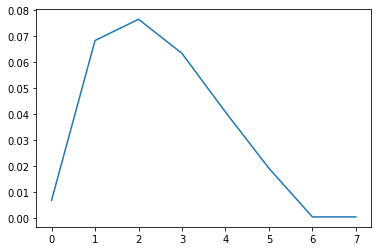

In [145]:
plt.plot(distances)
print("Optimal Cluster count for Landscape Image: ", optimal_k)

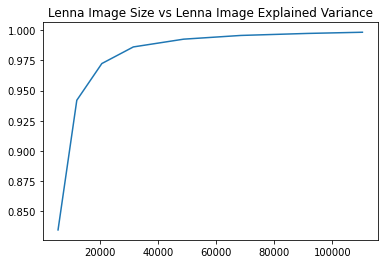

In [146]:
# In order to find the optimal elbow point mathematically, we draw a line from the first element in our silhouette score and the last element in our silhouette score. 
# And, we need to find the differences between each (silhouette score,image size(bytes)) point to our line. 
# The point which has the largest distance to our line will represent the optimal cluster count.  
# Lenna
distances = []
for i in range(len(lenna_size)):
  if i < 7:
    p1 = (lenna_size[0], lenna_silhouette[0])
    p2 = (lenna_size[7], lenna_silhouette[7])
    p3 = (lenna_size[i + 1], lenna_silhouette[i])
  distances.append(np.abs(np.cross(tuple(map(lambda i, j: i - j, p2, p1)) , tuple(map(lambda i, j: i - j, p1, p3)) )) / np.linalg.norm(tuple(map(lambda i, j: i - j, p2, p1))))
  # We need to add 2 to the value because we find the differences of each point thus one point is removed. And list index starts from 0.
optimal_k = 2**(distances.index(np.max(distances)) + 2)
optimal_k
plt.title("Lenna Image Size vs Lenna Image Explained Variance")
plt.plot(lenna_size, lenna_silhouette)

Optimal Cluster count for Lenna Image:  16


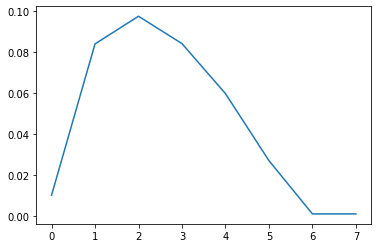

In [147]:
plt.plot(distances)
print("Optimal Cluster count for Lenna Image: ", optimal_k)

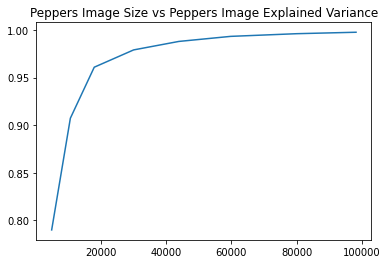

In [148]:
# In order to find the optimal elbow point mathematically, we draw a line from the first element in our silhouette score and the last element in our silhouette score. 
# And, we need to find the differences between each (silhouette score,image size(bytes)) point to our line. 
# The point which has the largest distance to our line will represent the optimal cluster count.  
# Peppers
distances = []
for i in range(len(peppers_size)):
  if i < 7:
    p1 = (peppers_size[0], peppers_silhouette[0])
    p2 = (peppers_size[7], peppers_silhouette[7])
    p3 = (peppers_size[i + 1], peppers_silhouette[i])
  distances.append(np.abs(np.cross(tuple(map(lambda i, j: i - j, p2, p1)) , tuple(map(lambda i, j: i - j, p1, p3)) )) / np.linalg.norm(tuple(map(lambda i, j: i - j, p2, p1))))
  # We need to add 2 to the value because we find the differences of each point thus one point is removed. And list index starts from 0.
optimal_k = 2**(distances.index(np.max(distances)) + 2)
optimal_k
plt.title("Peppers Image Size vs Peppers Image Explained Variance")
plt.plot(peppers_size, peppers_silhouette)

Optimal Cluster count for Pepper Image:  16


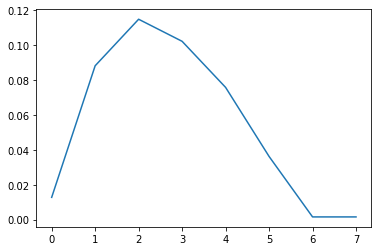

In [149]:
plt.plot(distances)
print("Optimal Cluster count for Pepper Image: ", optimal_k)

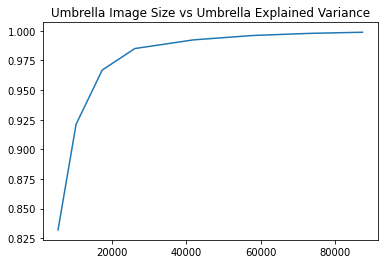

In [150]:
# In order to find the optimal elbow point mathematically, we draw a line from the first element in our silhouette score and the last element in our silhouette score. 
# And, we need to find the differences between each (silhouette score,image size(bytes)) point to our line. 
# The point which has the largest distance to our line will represent the optimal cluster count.  
# Umbrella
distances = []
for i in range(len(umbrella_size)):
  if i < 7:
    p1 = (umbrella_size[0], umbrella_silhouette[0])
    p2 = (umbrella_size[7], umbrella_silhouette[7])
    p3 = (umbrella_size[i + 1], umbrella_silhouette[i])
  distances.append(np.abs(np.cross(tuple(map(lambda i, j: i - j, p2, p1)) , tuple(map(lambda i, j: i - j, p1, p3)) )) / np.linalg.norm(tuple(map(lambda i, j: i - j, p2, p1))))
  # We need to add 2 to the value because we find the differences of each point thus one point is removed. And list index starts from 0.
optimal_k = 2**(distances.index(np.max(distances)) + 2)
plt.title("Umbrella Image Size vs Umbrella Explained Variance")
plt.plot(umbrella_size, umbrella_silhouette)

Optimal Cluster count for Umbrella Image:  16


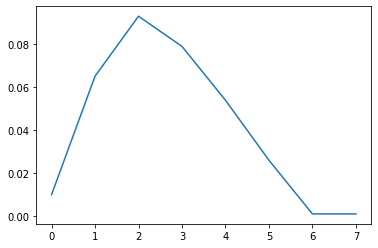

In [151]:
plt.plot(distances)
print("Optimal Cluster count for Umbrella Image: ", optimal_k)

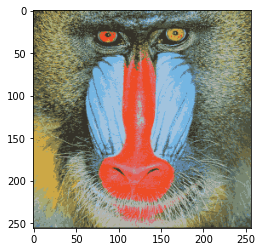

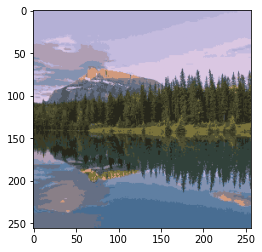

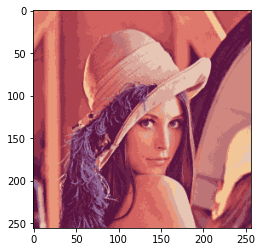

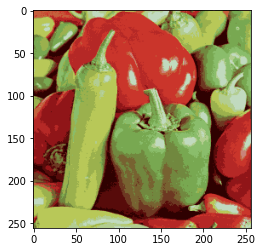

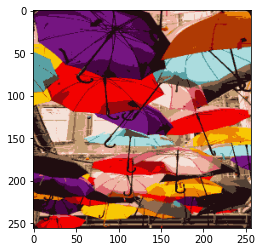

In [136]:
# Displaying the best quality images from the comparison of the explained variance and image size of the original images
best_quality_images = ["baboon_16.png", "landscape_16.png", "lenna_16.png", "peppers_16.png", "umbrella_16.png"]
for i in best_quality_images:
  plt.figure()
  image = plt.imread(i)
  plt.imshow(image)